In [50]:
# Import necessary libraries

# For data analysis
import pandas as pd
import numpy as np

# For data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Data pre-processing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Handling imbalance class distribution
from imblearn.over_sampling import SMOTE

# Classifier libraries -ML algorithms
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Evaluation Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix

In [10]:
# Load dataset
data = pd.read_csv(r"C:\Users\hp\Desktop\10alytics\Capstone Project\diabetes_prediction_dataset.csv")
print(data.shape)
data.head()

(100000, 9)


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [105]:
# Data verification -  Data type, number of features and rows, missing data. etc

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [106]:
data.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


##### There are variations between the mean and the median, this means there are outliers in the data set. 
##### Further exploratory data analysis will confirm the above.

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


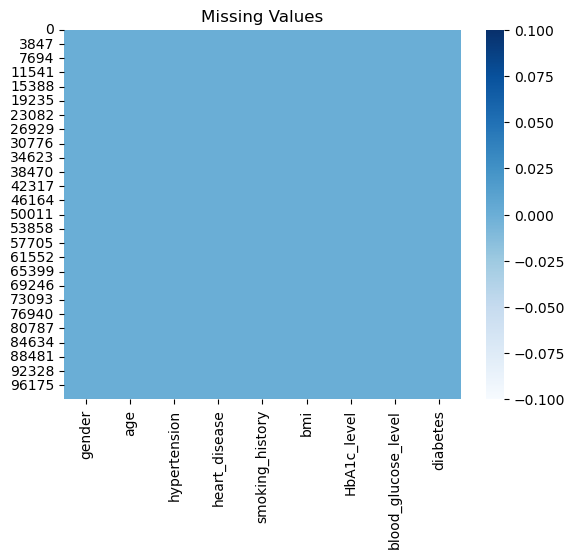

In [280]:
# Check for missing values
print(data.isnull().sum())

# Visualising missing data
sns.heatmap(data.isnull(), cmap="Blues")
plt.title("Missing Values");

###### This shows that there are no missing values in the data set.

In [16]:
data.select_dtypes(include="object").columns.to_list()

['gender', 'smoking_history']

In [17]:
data.select_dtypes(include="number").columns.to_list()

['age',
 'hypertension',
 'heart_disease',
 'bmi',
 'HbA1c_level',
 'blood_glucose_level',
 'diabetes']

### Exploratory Data Analysis

#### Univariate analysis

label
No     91500
Yes     8500
Name: count, dtype: int64


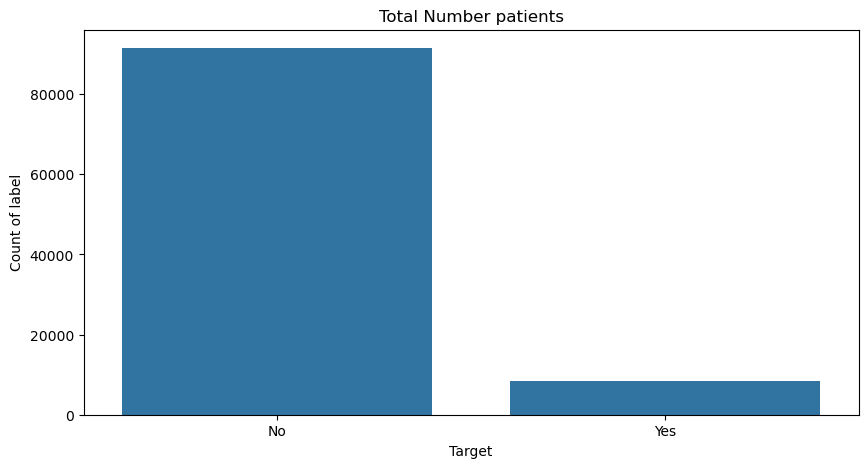

In [11]:
# Categorical columns
# Data visualization
# target - have diabetes or not (1: Yes, 0:no)
def label(tg):
    if tg == 1:
        return "Yes"
    else:
        return "No"
    

data["label"] = data["diabetes"].apply(label)
print(data["label"].value_counts())

# investigating target distribution
plt.figure(figsize=(10,5))
sns.countplot(x=data["label"])
plt.xlabel("Target")
plt.ylabel("Count of label")
plt.title("Total Number patients");

age_bracket
Youth(<=35)        39988
Adult(<=55)        27750
Elderly(>65)       17434
Old Adult(<=65)    14828
Name: count, dtype: int64


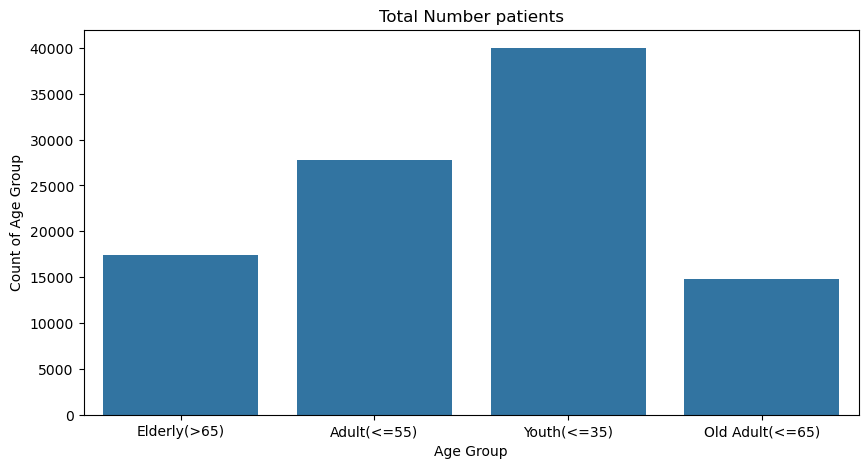

In [12]:
# Data visualization
#Age bracket
def age_bracket(age):
    if age <= 35:
        return "Youth(<=35)"
    elif age <55:
        return "Adult(<=55)"
    elif age <= 65:
        return "Old Adult(<=65)"
    else:
        return "Elderly(>65)"

data["age_bracket"] = data["age"].apply(age_bracket)
print(data["age_bracket"].value_counts())

# investigating the age group of patients
plt.figure(figsize=(10,5))
sns.countplot(x=data["age_bracket"])
plt.xlabel("Age Group")
plt.ylabel("Count of Age Group")
plt.title("Total Number patients");

smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64


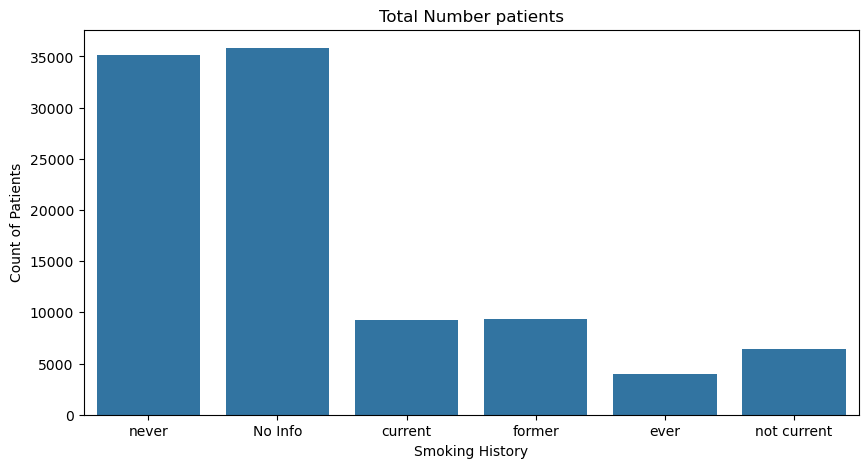

In [13]:
# Data Visualisation
# investigating the smoking hisotry of patients
print(data["smoking_history"].value_counts())

plt.figure(figsize=(10,5))
sns.countplot(x=data["smoking_history"])
plt.xlabel("Smoking History")
plt.ylabel("Count of Patients")
plt.title("Total Number patients");

gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64


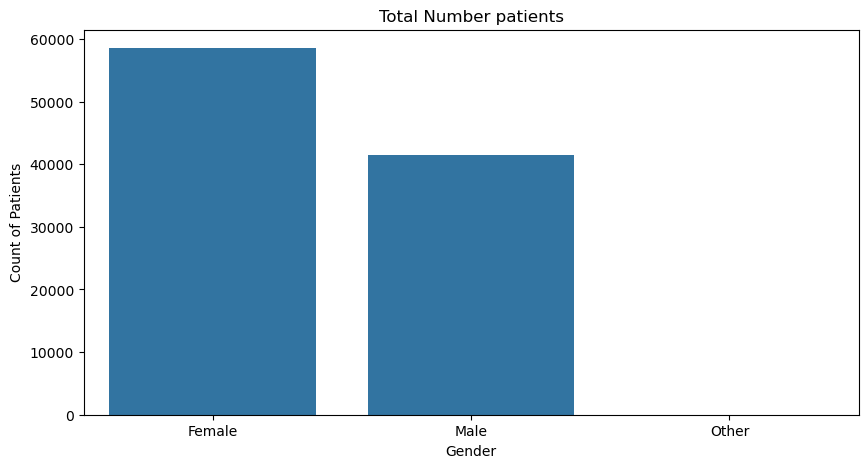

In [14]:
# Data Visualisation
# investigating the gender of patients
print(data["gender"].value_counts())

plt.figure(figsize=(10,5))
sns.countplot(x=data["gender"])
plt.xlabel("Gender")
plt.ylabel("Count of Patients")
plt.title("Total Number patients");

hyp_cat
No     92515
Yes     7485
Name: count, dtype: int64


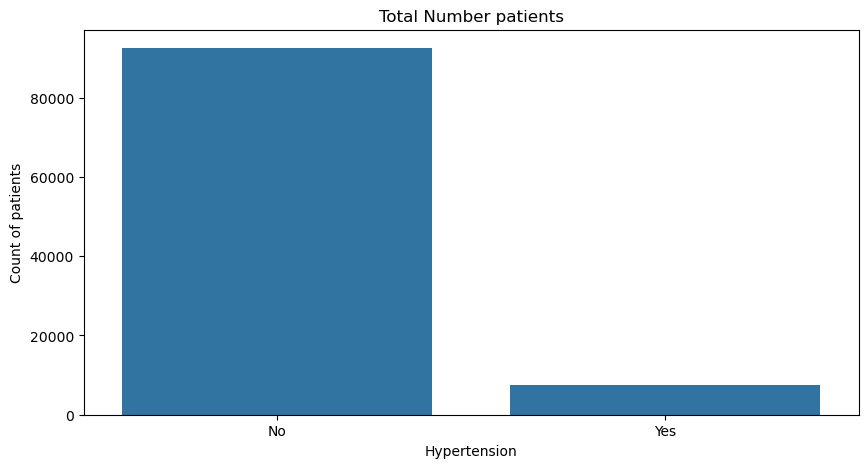

In [15]:
# Data visualization
# Hypetension - have hypertension or not (1: Yes, 0:no)
def hyper(hyp):
    if hyp == 1:
        return "Yes"
    else:
        return "No"
    

data["hyp_cat"] = data["hypertension"].apply(hyper)
print(data["hyp_cat"].value_counts())

# investigating the type of chest pain of patients
plt.figure(figsize=(10,5))
sns.countplot(x=data["hyp_cat"])
plt.xlabel("Hypertension")
plt.ylabel("Count of patients")
plt.title("Total Number patients");

heart_dis_cat
No     96058
Yes     3942
Name: count, dtype: int64


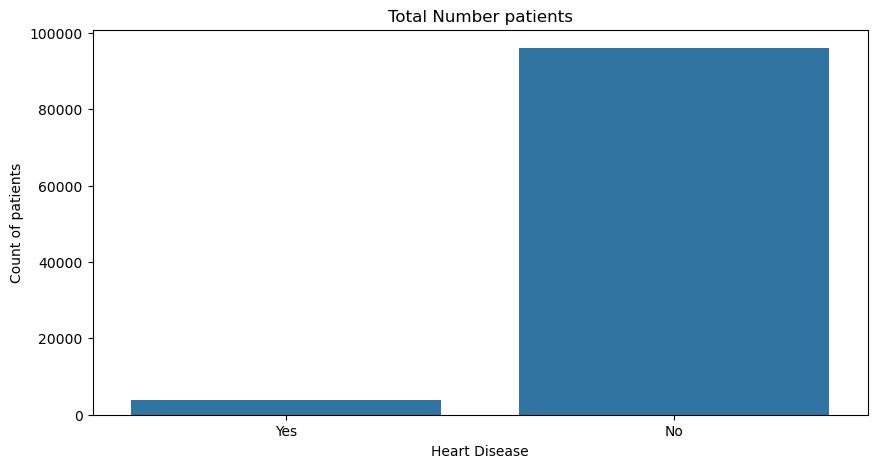

In [19]:
# Data visualization
# Heart disease - have heart disease or not (1: Yes, 0:no)
def heart_dis(ht):
    if ht == 1:
        return "Yes"
    else:
        return "No"
    

data["heart_dis_cat"] = data["heart_disease"].apply(heart_dis)
print(data["heart_dis_cat"].value_counts())

# investigating the heart disease distribution
plt.figure(figsize=(10,5))
sns.countplot(x=data["heart_dis_cat"])
plt.xlabel("Heart Disease")
plt.ylabel("Count of patients")
plt.title("Total Number patients");

In [112]:
data.head(3)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,label,age_bracket,hyp_cat,heart_dis_cat
0,Female,80.0,0,1,never,25.19,6.6,140,0,No,Elderly(>65),No,Yes
1,Female,54.0,0,0,No Info,27.32,6.6,80,0,No,Adult(<=55),No,No
2,Male,28.0,0,0,never,27.32,5.7,158,0,No,Youth(<=35),No,No


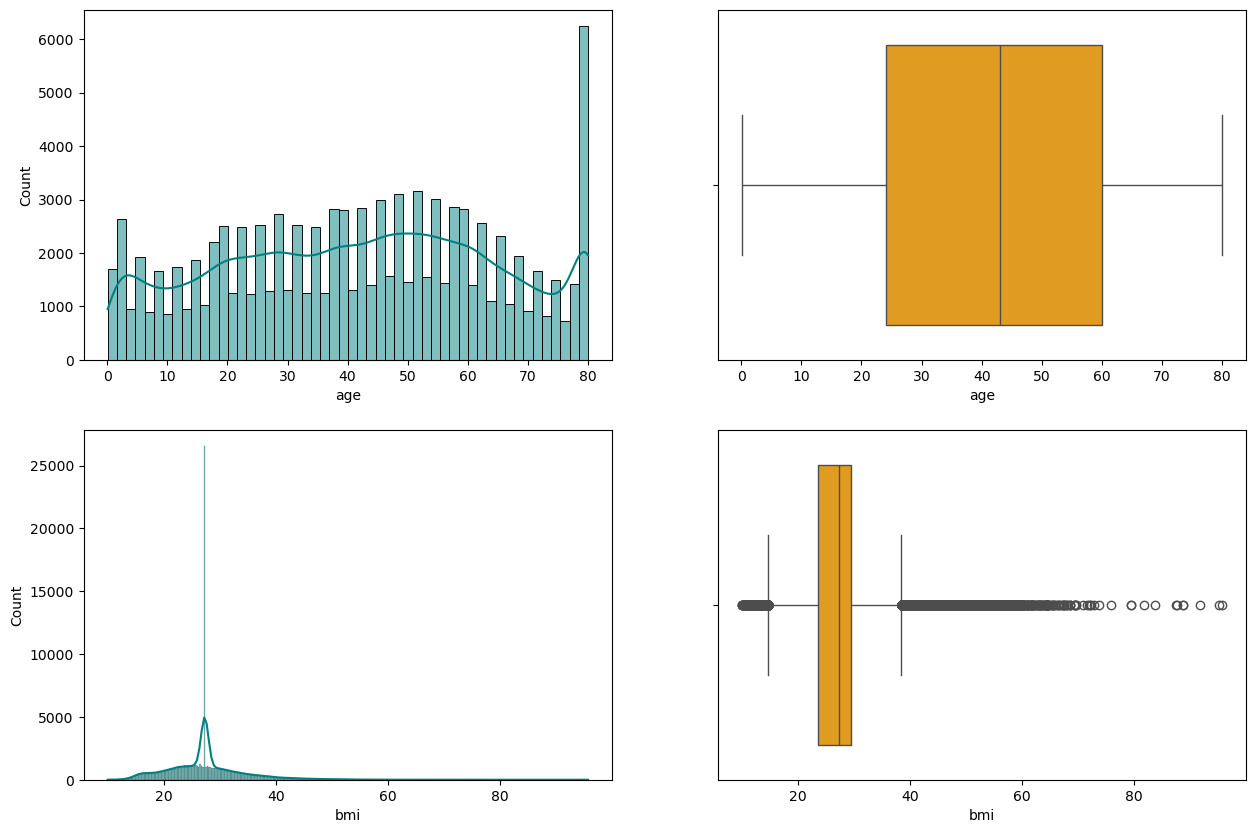

In [16]:
# numerical analysis
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15,10))

sns.histplot(data['age'], color='teal', kde=True, ax=axs[0,0])
sns.boxplot(x=data["age"], color="orange", ax=axs[0,1])

sns.histplot(data['bmi'], color='teal', kde=True, ax=axs[1,0])
sns.boxplot(x=data["bmi"], color="orange", ax=axs[1,1]);

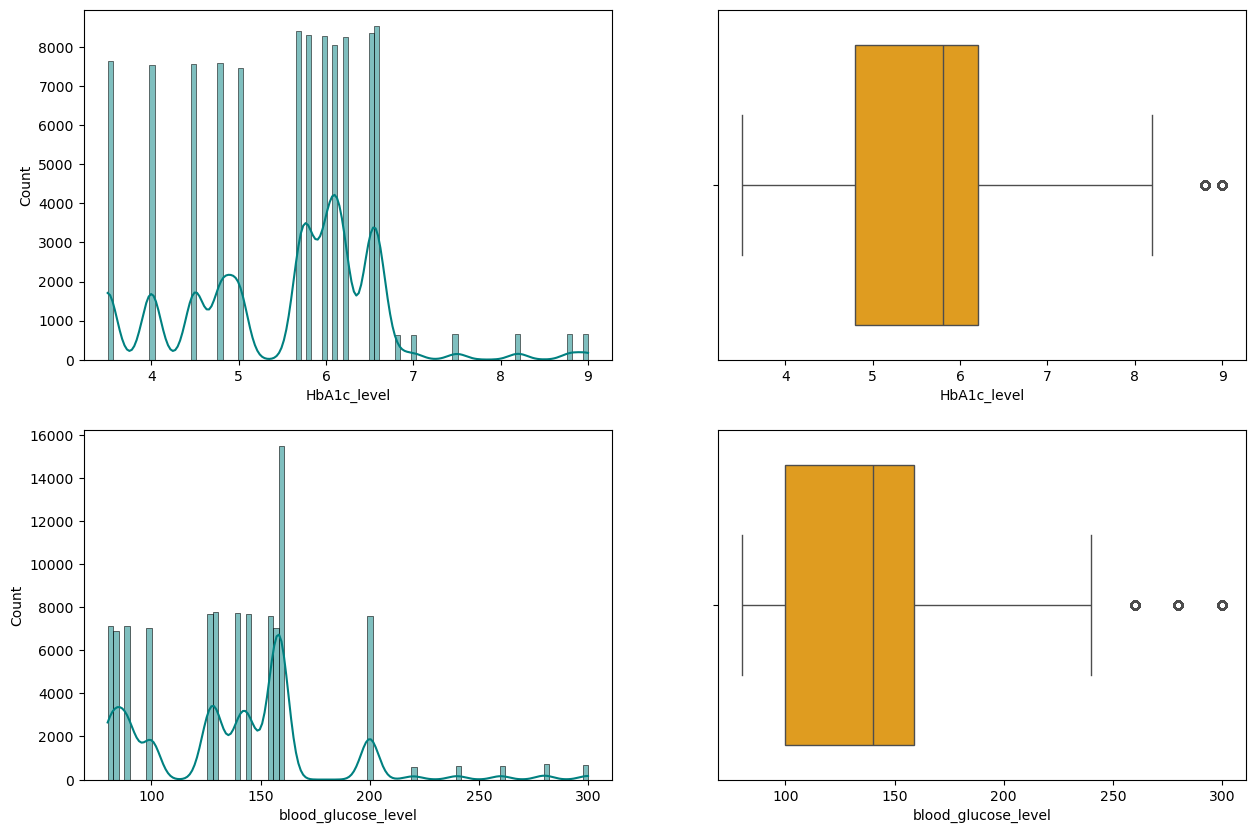

In [51]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15,10))

sns.histplot(data['HbA1c_level'], color='teal', kde=True, ax=axs[0,0])
sns.boxplot(x=data["HbA1c_level"], color="orange", ax=axs[0,1])

sns.histplot(data['blood_glucose_level'], color='teal', kde=True, ax=axs[1,0])
sns.boxplot(x=data["blood_glucose_level"], color="orange", ax=axs[1,1]);

##### The histplot and boxplot visualisations further confirms outliers in the data set.

#### Bivariate analysis

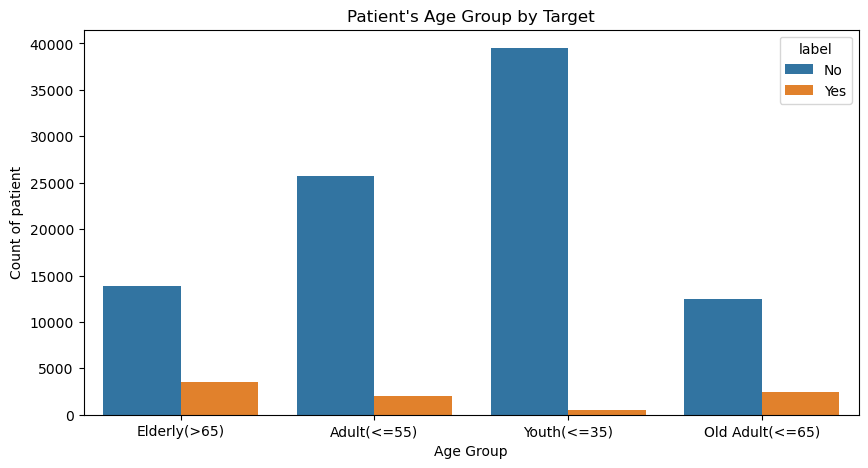

In [17]:
# Investigate the age group of patients by the target feature
plt.figure(figsize=(10,5))
sns.countplot(x="age_bracket", data=data, hue="label")
plt.xlabel("Age Group")
plt.ylabel("Count of patient")
plt.title("Patient's Age Group by Target");

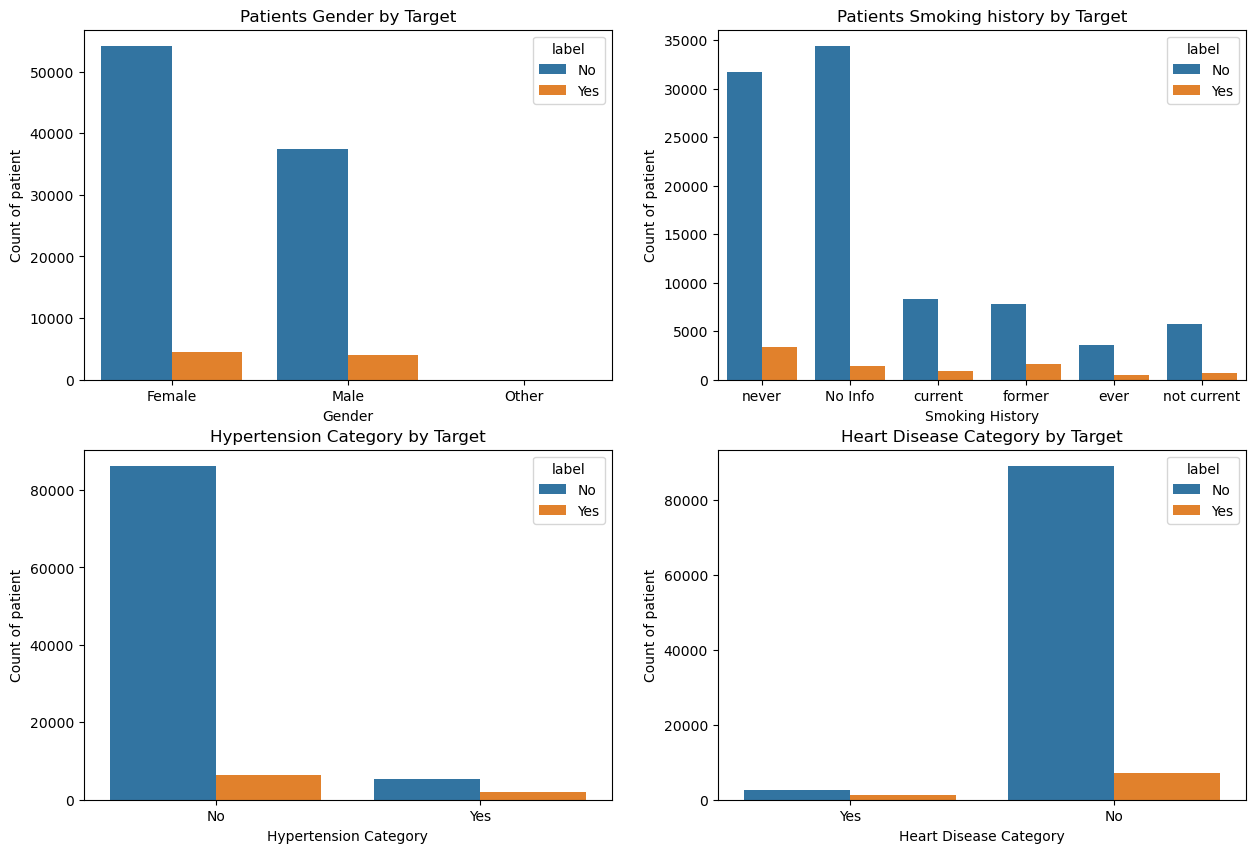

In [20]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15,10))

sns.countplot(x="gender", data=data, hue="label", ax=axs[0,0])
axs[0,0].set_title('Patients Gender by Target')
axs[0,0].set_xlabel("Gender")
axs[0,0].set_ylabel("Count of patient")

sns.countplot(x="smoking_history", data=data, hue="label", ax=axs[0,1])
axs[0,1].set_title('Patients Smoking history by Target')
axs[0,1].set_xlabel("Smoking History")
axs[0,1].set_ylabel("Count of patient")

sns.countplot(x="hyp_cat", data=data, hue="label", ax=axs[1,0])
axs[1,0].set_title('Hypertension Category by Target')
axs[1,0].set_xlabel("Hypertension Category")
axs[1,0].set_ylabel("Count of patient")

sns.countplot(x="heart_dis_cat", data=data, hue="label", ax=axs[1,1])
axs[1,1].set_title('Heart Disease Category by Target')
axs[1,1].set_xlabel("Heart Disease Category")
axs[1,1].set_ylabel("Count of patient");

#### Multivariate Analysis

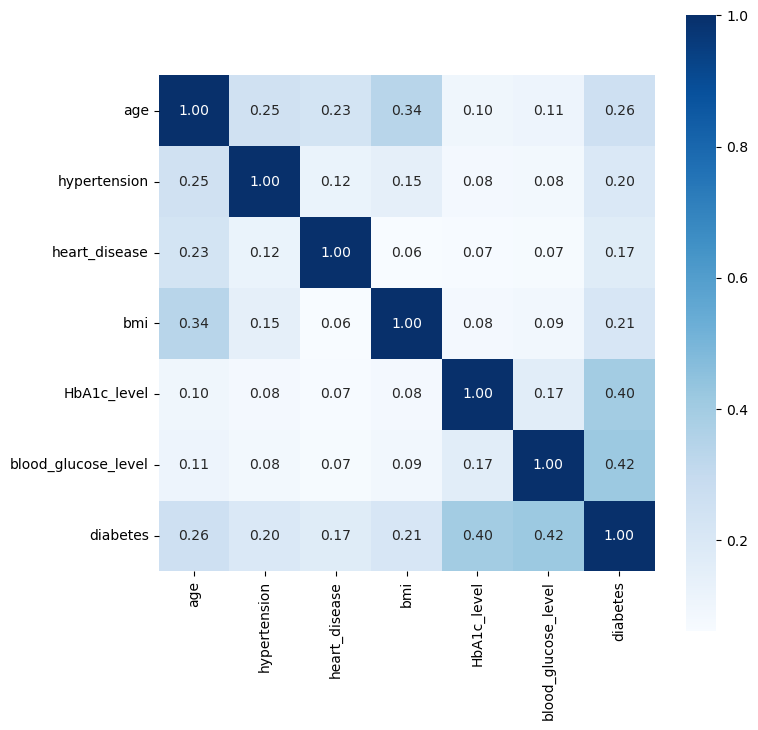

In [21]:
# Correlation between target and other variables in the dataset
corr_data = data.select_dtypes(include="number")

plt.figure(figsize=(8,8))
hm =  sns.heatmap(corr_data.corr(), cbar=True, cmap="Blues", annot=True, square=True, fmt='.2f',
                  annot_kws={'size':10})           

#### Data Preprocessing


In [22]:
# feature engineering
print(f"The dataset contain {len(data)} records before spliting")

The dataset contain 100000 records before spliting


In [23]:
data.drop(["label", "age_bracket", "hyp_cat", "heart_dis_cat"], axis=1, inplace=True)

In [24]:
data.head(2)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0


In [25]:
# extracting target 
target = data[["diabetes"]]
target.head(2)

,diabetes
0,0
1,0


In [26]:
features = data.drop("diabetes", axis=1)
features.head(2)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,Female,80.0,0,1,never,25.19,6.6,140
1,Female,54.0,0,0,No Info,27.32,6.6,80


In [27]:
# inititalizing label encoder
encoder = LabelEncoder()

In [28]:
cat_columns = data.select_dtypes(include="object").columns.to_list()
cat_columns

['gender', 'smoking_history']

In [29]:
# fit and transfrom the categorical columns
for column_name in cat_columns:
    features[column_name] = encoder.fit_transform(features[column_name])

features.head(2)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,0,80.0,0,1,4,25.19,6.6,140
1,0,54.0,0,0,0,27.32,6.6,80


In [30]:
# Dealing with Outliers -  'bmi', 'HbA1c_level', 'blood_glucose_level'
#Normalize the data
scaler = MinMaxScaler()

features["Scaled_bmi"] = scaler.fit_transform(features["bmi"].values.reshape(-1,1))
features["Scaled_HbL"] = scaler.fit_transform(features["HbA1c_level"].values.reshape(-1,1))
features["Scaled_Bgl"] = scaler.fit_transform(features["blood_glucose_level"].values.reshape(-1,1))

features.drop(['bmi', 'HbA1c_level', 'blood_glucose_level'], axis=1, inplace=True)
features.head(2)

,gender,age,hypertension,heart_disease,smoking_history,Scaled_bmi,Scaled_HbL,Scaled_Bgl
0,0,80.0,0,1,4,0.177171,0.563636,0.272727
1,0,54.0,0,0,0,0.202031,0.563636,0.000000


#### Machine Learning

diabetes
0           91500
1            8500
Name: count, dtype: int64 0:No, 1:Yes


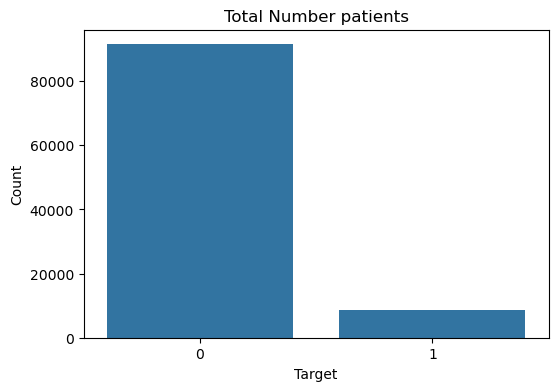

In [31]:
print(target.value_counts(), "0:No, 1:Yes")

plt.figure(figsize=(6,4))
sns.countplot(x=target["diabetes"])
plt.xlabel("Target")
plt.ylabel("Count")
plt.title("Total Number patients");

In [32]:
# Split data set into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [33]:
len(X_train)==len(y_train)

True

In [34]:
len(X_test)==len(y_test)

True

diabetes
NO     73208
Yes     6792
Name: count, dtype: int64


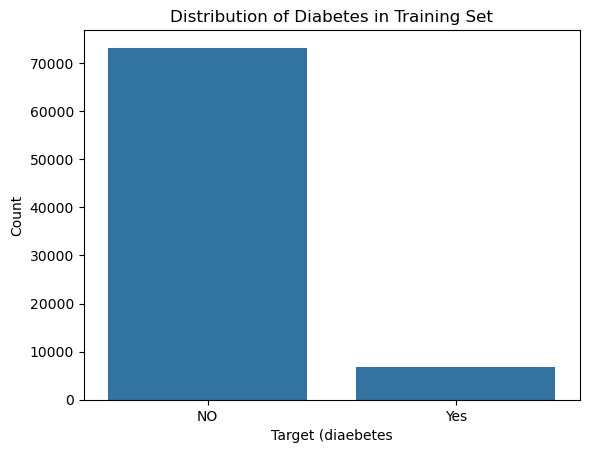

In [35]:
y_train_df = pd.DataFrame(y_train, columns= ["diabetes"])
y_train_df["diabetes"] = y_train_df["diabetes"].map({0: "NO", 1: "Yes"})
print(y_train_df["diabetes"].value_counts())

sns.countplot(x="diabetes", data =y_train_df)
plt.xlabel("Target (diaebetes")
plt.ylabel("Count")
plt.title("Distribution of Diabetes in Training Set")
plt.show()

##### The training set distribution class is imbalance which will make the model prediction bias.
##### The imbalance class will be treated using sampling methods.

In [36]:
# oversampling with SMOTE

smt = SMOTE(sampling_strategy =0.6, random_state = 42)
X_smt, y_smt = smt.fit_resample(X_train, y_train)

diabetes
NO     73208
Yes    43924
Name: count, dtype: int64
No of records added: 37132


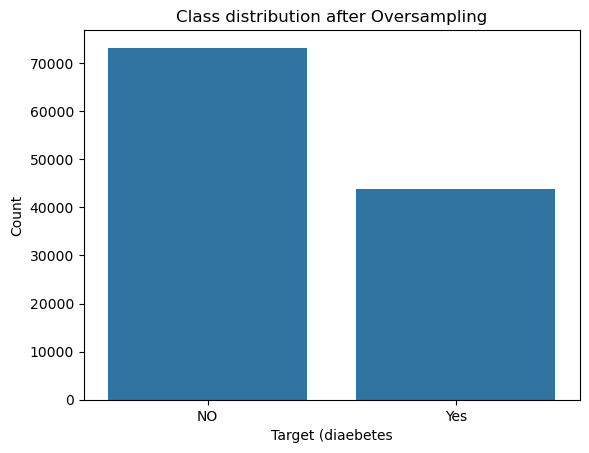

In [37]:
#y_smt.value_counts()

y_smt_df = pd.DataFrame(y_smt, columns= ["diabetes"])
y_smt_df["diabetes"] = y_smt_df["diabetes"].map({0: "NO", 1: "Yes"})
print(y_smt_df["diabetes"].value_counts())
print("No of records added:",y_smt.shape[0] - y_train.shape[0])

sns.countplot(x="diabetes", data =y_smt_df)
plt.xlabel("Target (diaebetes")
plt.ylabel("Count")
plt.title("Class distribution after Oversampling")
plt.show()

XGB Classifier after oversampling with smote
Accuracy: 0.9711
Precision: 0.9359567901234568
Recall: 0.7101873536299765
F1-score: 0.8075898801597869
AUC-ROC: 0.8528249254482706


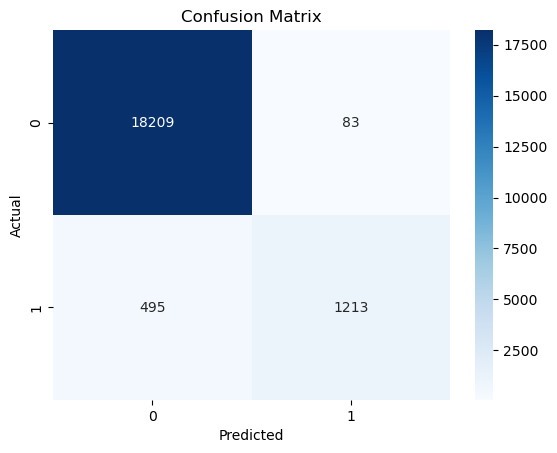

In [38]:
# Model Building

# XGB Classifier
model = XGBClassifier()
model.fit(X_smt, y_smt)
y_pred = model.predict(X_test)

print("XGB Classifier after oversampling with smote")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))
print("AUC-ROC:", roc_auc_score(y_test, y_pred))

# create confusion matrix
matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
sns.heatmap(matrix, annot=True, cmap="Blues", fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest after oversampling with smote
Accuracy: 0.9627
Precision: 0.8181216931216931
Recall: 0.7242388758782201
F1-score: 0.7683229813664596
AUC-ROC: 0.8546024906397441


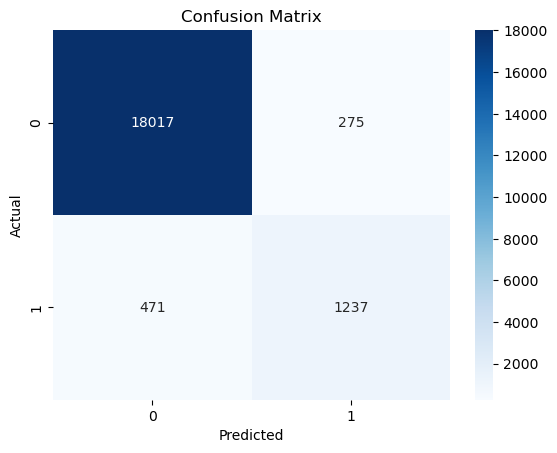

In [49]:
model = RandomForestClassifier(random_state=42)
model.fit(X_smt, y_smt)
y_pred = model.predict(X_test)

print("Random Forest after oversampling with smote")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))
print("AUC-ROC:", roc_auc_score(y_test, y_pred))

# create confusion matrix
matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
sns.heatmap(matrix, annot=True, cmap="Blues", fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Decision tree after oversampling
Accuracy: 0.94755
Precision: 0.6744309158284807
Recall: 0.7459016393442623
F1-score: 0.7083680845148735
AUC-ROC: 0.8561401920753676


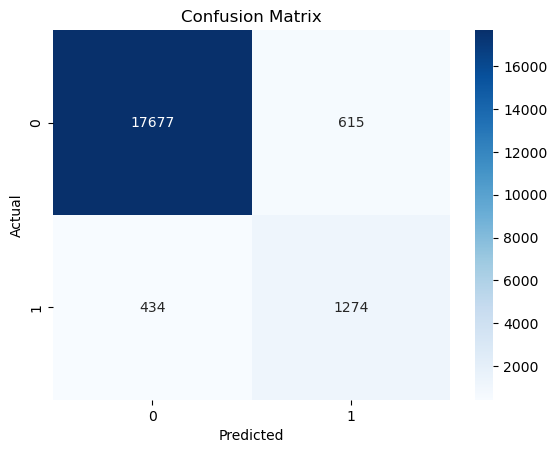

In [107]:
# Decision tree
model = DecisionTreeClassifier(random_state = 42)
model.fit(X_smt, y_smt)
y_pred = model.predict(X_test)

print("Decision tree after oversampling")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))
print("AUC-ROC:", roc_auc_score(y_test, y_pred))

# create confusion matrix
matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
sns.heatmap(matrix, annot=True, cmap="Blues", fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


ENSENBLE-Stacking Model after SMOTE
Accuracy: 0.96585
Precision: 0.8308586184635248
Recall: 0.7535128805620609
F1-score: 0.7902978200798281
AUC-ROC: 0.8695948395812709


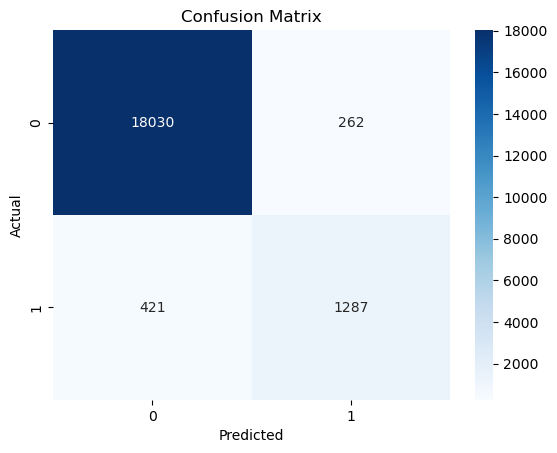

In [48]:

# Define base models
base_models_smt = [
    ('Decision tree', DecisionTreeClassifier(max_depth=5, random_state=42)),
    ('Random forest', RandomForestClassifier(max_depth=5, random_state=42)),
    ('XGB classifier', XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42))
]

# Define meta-model (final decision maker)
meta_model_smt = LogisticRegression()

# Create Stacking Classifier
stacking_clf_smt = StackingClassifier(estimators=base_models_smt, final_estimator=meta_model_smt, cv=5)
stacking_clf_smt.fit(X_smt, y_smt)

# Predict
y_pred = stacking_clf_smt.predict(X_test)

print("ENSENBLE-Stacking Model after SMOTE")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))
print("AUC-ROC:", roc_auc_score(y_test, y_pred))

# create confusion matrix
matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
sns.heatmap(matrix, annot=True, cmap="Blues", fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

###### Stacking combines the strengths of Decision Tree (higher recall), Random Forest (balanced performance), and XGBoost (high precision).
###### This combination results in a well-rounded model, making it a practical choice for Stark Health Clinic where both early detection (recall) and diagnostic accuracy (precision) matter.